## **Multi-Class Classification**

We have more than 2 levels. We are using the categorical cross-entropy loss and cost functions.

In [22]:
import numpy as np

## suppose this is a car
y_true = np.array([0,1,0])
p_hat = np.array([0.05,0.9,0.00])

def categorical_crossentropy(y_true, p_hat):
  return -(y_true[0]*np.log(p_hat[0]) + y_true[1]*np.log(p_hat[1]) + y_true[2]*np.log(p_hat[2])) ## 3 classes

In [23]:
## what happens when p_hat is zero?
## the p_hats get clipped (+ or - some small error if zero)
categorical_crossentropy(y_true, p_hat)

<ipython-input-22-7314fbd14c7b>:8: RuntimeWarning: divide by zero encountered in log
  return -(y_true[0]*np.log(p_hat[0]) + y_true[1]*np.log(p_hat[1]) + y_true[2]*np.log(p_hat[2])) ## 3 classes
<ipython-input-22-7314fbd14c7b>:8: RuntimeWarning: invalid value encountered in scalar multiply
  return -(y_true[0]*np.log(p_hat[0]) + y_true[1]*np.log(p_hat[1]) + y_true[2]*np.log(p_hat[2])) ## 3 classes


nan

In [25]:
## modified to account for zero
def categorical_crossentropy(y_true, p_hat):
  epsilon = 1e-15
  p_hat = np.clip(p_hat, epsilon, 1-epsilon)
  return -np.sum(y_true*np.log(p_hat))

In [26]:
categorical_crossentropy(y_true, p_hat)

0.10536051565782628

In [27]:
## what is the chance that a p_hat = 0?
## statistically, should be 0
## does it happen? yes

In [28]:
## good model
y_true = [1,0,0]
p_hat =[0.99, 0.005, 0.005]

categorical_crossentropy(y_true, p_hat)

0.01005033585350145

In [29]:
## good model
y_true = [1,0,0]
p_hat =[0.05, .7, 0.25]

categorical_crossentropy(y_true, p_hat)

2.995732273553991

In [30]:
## Categorical cross-entropy COST FUNCTION
## the average of the loss values across observations
## modified to account for zero
## if we assume that y_true and p_hat are matrices
def categorical_crossentropy_cost(y_true, p_hat):
  epsilon = 1e-15
  p_hat = np.clip(p_hat, epsilon, 1-epsilon)
  return -np.mean(y_true*np.log(p_hat))

## **Example**

Iris dataset. Flowers with measures of the petal and sepal width and length. We want to predict whether they are {setosa, versicolor, virginica}.

In [31]:
from sklearn import datasets
X, y = datasets.load_iris(return_X_y = True)

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
## Most models use One vs All (OvR)
## the models get broken down into a series of binary classifications
## setosa vs {virginica, versicolor}  we get p_hat1
## virginica vs {setosa, versicolor}  we get p_hat2
## versicolor vs {setosa, virginical} we get p_hat3
## obs1 = softmax([phat1, phat2, phat3]) to sum to 1

In [35]:
## A second strategy One vs One (OvO)
## the models get broken into series of binary classifications
## setosa vs virginica  we get p_hat1
## setosa vs versicolor we get p_hat2
## virginica vs versicolor we get p_hat3
## obs = softmax([phat1, phat2, phat3, ....])

In [39]:
from sklearn.linear_model import LogisticRegression

## instance
## this is a ONE VS REST approach
## cost function: categorical cross entropy (multinomial logistic regression)
## softmax
lr = LogisticRegression(max_iter = 500)

## fit
lr.fit(X,y)

## predict
yhat = lr.predict(X)

In [42]:
## if predictive model, no need to interpret
## predictive model (descriptive)
np.round(lr.predict_proba(X), decimals=2) ## sum to 1 because of the softmax function

array([[0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.98, 0.02, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.95, 0.05, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.98, 0.02, 0.  ],
       [0.98, 0.02, 0.  ],
 

In [45]:
## prediction is np.argmax(p_hat, axis = 1)
p_hat = lr.predict_proba(X)
np.argmax(p_hat, axis = 1) ## select the highest prob

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
## interpretations
lr.coef_  ## slopes of each variable
## model 1: class 0 vs the rest (-0.42456599,  0.96664261, -2.51554625, -1.08216927)
## x1 = sepal width
## model 1: as x1 increases by 1, then the log(odds) of being a setosa flower decrease 0.42456599

array([[-0.42456599,  0.96664261, -2.51554625, -1.08216927],
       [ 0.53541119, -0.32073935, -0.20740629, -0.94263206],
       [-0.1108452 , -0.64590325,  2.72295254,  2.02480133]])

In [48]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [49]:
## do all models have OvR approach?
## tree-based (RF,  XGBoost, Adaboost)
## does not need to be binary

In [50]:
from sklearn.ensemble import RandomForestClassifier

## instance
rf = RandomForestClassifier()

## fit and predict
yhat1 = rf.fit(X,y).predict(X)

In [51]:
yhat1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
## what if you want to implement OvR on a model?
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

## instance of OnevsRest wrapped around the RF (model)
rf_OvR = OneVsRestClassifier(RandomForestClassifier())

## fit
yhat2 = rf_OvR.fit(X, y).predict(X)

In [53]:
yhat2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
## One vs One might pick difference between similar classes
## One vs Rest might be able to isolate some classes that are difficult to predict
## if your classes are imbalanced
## y [0.45, 0.20, 0.35]

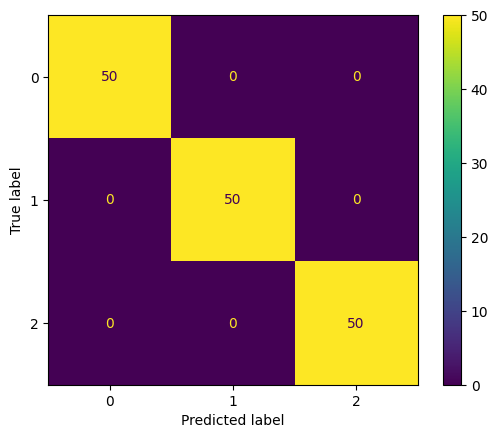

In [55]:
## metrics
## same
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay(confusion_matrix(y, yhat1)).plot()

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y, yhat1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [ ]:
from tensorflow.keras.import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

## y = ["pos", "neg", "net"]   ------ y = [1,2,3,]   ## loss = "categorical_crossentropy"
## y = onehot encode y = [1,0,0]  [0,1,0]            ## loss = "sparse_categorical_crossentropy"